<a href="https://colab.research.google.com/github/pscabral/IFMASOFTEX_1/blob/main/Yolo236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO
import cv2

model = YOLO('/content/best.pt')

def run():

    model.predict(
        source="./0_100_jpg.rf.f1cc133677a85f6b59cdc0f4869e68bd.jpg",
        conf=0.25,
        save=True,
        show=True,
        save_crop=True
    )

if __name__ == '__main__':
    run()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/0_100_jpg.rf.f1cc133677a85f6b59cdc0f4869e68bd.jpg: 640x640 1 banana, 255.3ms
Speed: 5.6ms preprocess, 255.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


In [24]:
from ultralytics import YOLO

# load the trained model
model = YOLO('/content/best.pt')


def run():
    # predict method of YOLOv8
    model.predict(
        #source="./istockphoto-92576519-640_adpp_is.mp4",                  # using video as input source
        source=0,                             # using camera as input source
        conf=0.25,                            # confidence threshold for detection
        save=True,                            # save results
        show=True,                            # show results
        save_crop=True                        # save the cropped image from the results
    )

if __name__ == '__main__':
    run()

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




NotImplementedError: ignored

In [29]:
!pip install opencv-python

In [4]:
import cv2
import sys
import os
from ultralytics import YOLO

model = YOLO("/content/best.pt")  # path to model file
cap = cv2.VideoCapture(3)  # path to video file or webcam
crop_filename = "crop"  # set the crop file name
crop_count = 0

if not cap.isOpened():
    print("Error reading video file")
    sys.exit()

if not os.path.exists("crop"):
    os.mkdir("crop")

while cap.isOpened():

    success, frame = cap.read()
    if success:
        results = model.predict(frame, verbose=False)
        boxes = results[0].boxes.xyxy.cpu()
        for box in boxes:
            crop_count += 1
            crop_object = frame[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
            cv2.imwrite(os.path.join("crop", crop_filename+ f"_{crop_count}.png"), crop_object)

        cv2.imshow("YOLOv8 Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

Error reading video file


SystemExit: ignored

In [7]:
import cv2
import sys
import os
from ultralytics import YOLO

def crop_objects(video_path, model_path, output_format, confidence_threshold):

    # Load the model
    model = YOLO("/content/best.pt")

    # Create the output directory
    if not os.path.exists("crop"):
        os.mkdir("crop")

    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Start the loop
    while cap.isOpened():

        # Read the next frame
        success, frame = cap.read()

        # If the frame was not read successfully, break the loop
        if not success:
            break

        # Detect objects in the frame
        results = model.predict(frame, verbose=False)

        # Extract bounding box coordinates for each detected object
        boxes = results[0].boxes.xyxy.cpu()

        # Crop the object area from the frame based on the bounding box coordinates
        for box in boxes:

            # If the confidence score is above the threshold, crop the object
            if box.confidence > confidence_threshold:

                # Crop the object
                crop_object = frame[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

                # Save the cropped object
                cv2.imwrite(os.path.join("crop", f"{box.class_name}_{box.id}_{confidence_threshold}_{int(time.time())}.{output_format}"), crop_object)

        # Display the frame with detected objects
        cv2.imshow("YOLOv8 Detection", frame)

        # Wait for a key press
        key = cv2.waitKey(1)

        # If the 'q' key is pressed, break the loop
        if key == ord("q"):
            break

    # Release the video capture
    cap.release()

    # Destroy all OpenCV windows
    cv2.destroyAllWindows()

if __name__ == "__main__":

    # Specify the video path, model path, output format, and confidence threshold
    video_path = "/path/to/video.mp4"
    model_path = "/path/to/model.pt"
    output_format = "png"
    confidence_threshold = 0.5

    # Crop the objects in the video
    crop_objects(video_path, model_path, output_format, confidence_threshold)


In [32]:
cap = cv2.VideoCapture(0)
print("Is video capture opened?", cap.isOpened())

Is video capture opened? False


In [33]:
cap = cv2.VideoCapture(1)  # Try different indices
print("Is video capture opened?", cap.isOpened())


Is video capture opened? False


In [27]:
cap = cv2.VideoCapture(1)  # Use 1 instead of 0

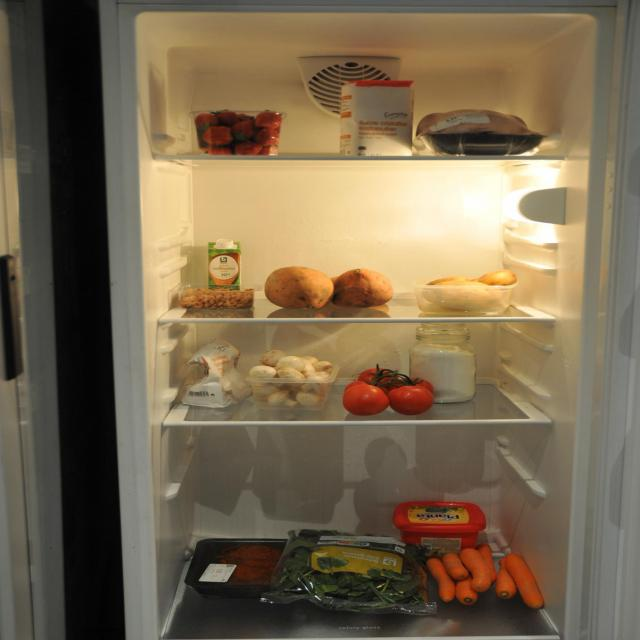

In [25]:
from IPython.display import Image
Image('/content/DSC_5687_JPG_jpg.rf.0cec41d1dc376062bc1fa556456c762c.jpg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1449  100  1449    0     0   5498      0 --:--:-- --:--:-- --:--:--  5509


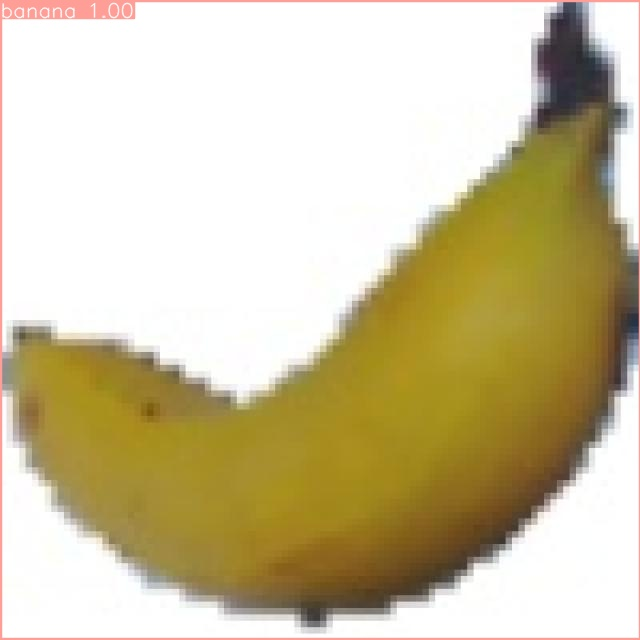

In [17]:
from google.colab.patches import cv2_imshow
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_512px.png
import cv2
img = cv2.imread('/content/runs/detect/predict2/0_100_jpg.rf.f1cc133677a85f6b59cdc0f4869e68bd.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [9]:
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Load the trained YOLO model
model = YOLO('/content/best.pt')

def take_photo_and_detect(filename='photo.jpg', quality=0.8):
    # JavaScript code to capture a photo from the webcam
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    # Display the JavaScript code for capturing a photo
    display(js)

    # Capture a photo and save it to a file
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    # Use the YOLO model to predict objects in the captured photo
    result = model([filename])

    # Display the results
    result.show()

# Run the combined function
if __name__ == '__main__':
    take_photo_and_detect()


<IPython.core.display.Javascript object>


0: 480x640 2 capsicums, 329.6ms
Speed: 3.0ms preprocess, 329.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


AttributeError: ignored

In [10]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

name 'take_photo' is not defined
